In [1]:
# DisulfideBond Class Analysis Dictionary creation
# Author: Eric G. Suchanek, PhD.
# (c) 2023 Eric G. Suchanek, PhD., All Rights Reserved
# License: BSD
# Last Modification: 2/20/24 -egs-
# Cα Cβ Sγ

import pandas as pd
import numpy as np

import pyvista as pv
from pyvista import set_plot_theme

import proteusPy
from proteusPy import *
from proteusPy.Disulfide import *
from proteusPy.DisulfideList import DisulfideList
from proteusPy.utility import print_memory_used
from proteusPy.DisulfideClasses import plot_count_vs_classid, plot_count_vs_class_df, enumerate_sixclass_fromlist

# pyvista setup for notebooks
pv.set_jupyter_backend('trame')

print_memory_used()

THEME = 'light'


proteusPy 0.92.3: Memory Used: 0.22 GB


In [2]:

PDB_SS = Load_PDB_SS(verbose=True, subset=False)
PDB_SS.describe()


-> load_PDB_SS(): Reading /Users/egs/repos/proteusPy/proteusPy/data/PDB_SS_ALL_LOADER.pkl... 
-> load_PDB_SS(): Done reading /Users/egs/repos/proteusPy/proteusPy/data/PDB_SS_ALL_LOADER.pkl... 
    =========== RCSB Disulfide Database Summary ==============
       =========== Built: 2024-02-08 16:06:42 ==============
PDB IDs present:                    35818
Disulfides loaded:                  120494
Average structure resolution:       2.34 Å
Lowest Energy Disulfide:            2q7q_75D_140D
Highest Energy Disulfide:           1toz_456A_467A
Cα distance cutoff:                 8.00 Å
Total RAM Used:                     31.05 GB.
    ================= proteusPy: 0.89 =======================


In [3]:
PDB_SS.plot_binary_to_sixclass_incidence(light=True, save=False, savedir='/Users/egs/Documents/proteusPy')

Cutoff:   0.0 accounts for  100.00% and is  4004 members long.
Cutoff: 0.0102 accounts for   91.28% and is   940 members long.
Cutoff: 0.0204 accounts for   86.21% and is   592 members long.
Cutoff: 0.0306 accounts for   82.50% and is   441 members long.
Cutoff: 0.0408 accounts for   79.83% and is   365 members long.
Cutoff: 0.051 accounts for   77.97% and is   324 members long.
Cutoff: 0.0612 accounts for   75.69% and is   283 members long.
Cutoff: 0.0714 accounts for   73.45% and is   249 members long.
Cutoff: 0.0816 accounts for   71.13% and is   219 members long.
Cutoff: 0.0918 accounts for   69.73% and is   203 members long.
Cutoff: 0.102 accounts for   67.99% and is   185 members long.
Cutoff: 0.112 accounts for   65.74% and is   164 members long.
Cutoff: 0.122 accounts for   64.91% and is   157 members long.
Cutoff: 0.133 accounts for   64.15% and is   151 members long.
Cutoff: 0.143 accounts for   62.21% and is   137 members long.
Cutoff: 0.153 accounts for   60.29% and is   12

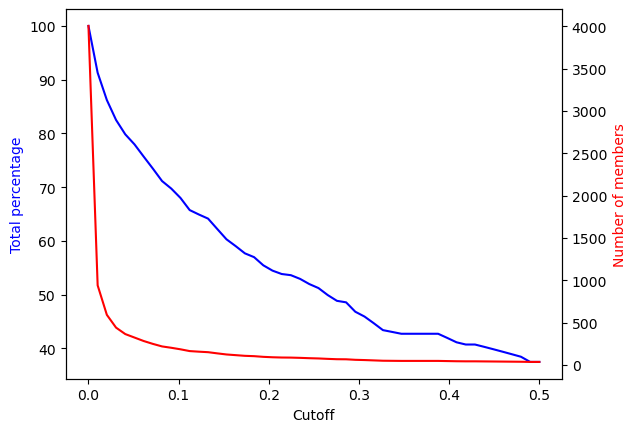

In [4]:
# the average structures for each class, returned as a 
# list of disulfides
cons_list = PDB_SS.tclass.load_consensus_file()
PDB_SS.plot_classes_vs_cutoff(.5, 50)

In [5]:
sixclass_df = PDB_SS.tclass.sixclass_df.copy()
sixclass_df.sort_values(by='percentage', ascending=False, inplace=True)
sixclass_df.head()


,class_id,ss_id,count,incidence,percentage
823,22222,"[1z3t_135A_394A, 1jc9_206A_219A, 3k0v_481A_675...",3079,0.025553,2.555314
210,12521,"[4lb7_2D_30D, 7nd8_131A_166A, 1aq7_136A_201A, ...",3073,0.025503,2.550334
211,12522,"[2hew_98F_183F, 1z3t_19A_25A, 2fk2_133A_187A, ...",2353,0.019528,1.952794
917,22522,"[1z3t_225A_245A, 7nd8_379A_432A, 7nd8_391A_525...",1923,0.015959,1.595930
916,22521,"[6vpa_176A_190A, 1z3t_173A_204A, 2any_136A_201...",1913,0.015876,1.587631


In [6]:
PDB_SS.tclass.classdf

,class_id,SS_Classname,FXN,ss_id,count,incidence,percentage
0,00000,-LHSpiral,UNK,"[2qhe_27A_126A, 2qhe_44A_105A, 2qhe_51A_98A, 2...",31511,0.261515,26.151510
1,00002,00002,UNK,"[2qhe_84A_96A, 4nz3_185A_200A, 4nzr_142H_208H,...",5804,0.048168,4.816837
2,00020,-LHHook,UNK,"[3l4o_38C_86C, 3l75_144E_160E, 3ulv_95A_122A, ...",3412,0.028317,2.831676
3,00022,00022,UNK,"[2hew_70F_163F, 5hdz_216A_420A, 5fji_73A_90A, ...",1940,0.016100,1.610039
4,00200,-RHStaple,Allosteric,"[1j5h_37A_47A, 4lb7_2D_30D, 2hew_98F_183F, 6vp...",12726,0.105615,10.561522
5,00202,00202,UNK,"[1zed_467A_474A, 2zxt_396A_398A, 2zwl_17L_22L,...",991,0.008224,0.822448
6,00220,00220,UNK,"[1j5h_88A_93A, 1chv_14S_38S, 2qhe_29A_45A, 4nz...",5665,0.047015,4.701479
7,00222,00222,UNK,"[4yys_56A_98A, 3l4o_36C_121C, 7nd8_336A_361A, ...",5091,0.042251,4.225107
8,02000,02000,UNK,"[1mfe_137L_196L, 6fuf_110A_187A, 4nz3_264A_281...",4714,0.039122,3.912228
9,02002,02002,UNK,"[6snc_134A_194A, 6vsz_261A_321A, 6vsz_367A_425...",3756,0.031172,3.117168


In [7]:
plot_count_vs_classid(PDB_SS.tclass.classdf, title='Disulfides by Binary Class')


In [8]:
plot_count_vs_classid(PDB_SS.tclass.sixclass_df, title='Disulfides by Sextant Class')

# Disulfide Binary Class Breakdown

|   class_id | SS_Classname   | FXN        |   count |   incidence |
|-----------:|:---------------|:-----------|--------:|------------:|
|      00000 | -LHSpiral      | UNK        |   31513 |  0.261092   |
|      00002 | 00002          | UNK        |    5805 |  0.0480956  |
|      00020 | -LHHook        | UNK        |    3413 |  0.0282774  |
|      00022 | 00022          | UNK        |    1940 |  0.0160733  |
|      00200 | -RHStaple      | Allosteric |   12735 |  0.105512   |
|      00202 | 00202          | UNK        |     993 |  0.00822721 |
|      00220 | 00220          | UNK        |    5674 |  0.0470103  |
|      00222 | 00222          | UNK        |    5092 |  0.0421883  |
|      02000 | 02000          | UNK        |    4749 |  0.0393465  |
|      02002 | 02002          | UNK        |    3774 |  0.0312684  |
|      02020 | -LHStaple      | UNK        |    1494 |  0.0123781  |
|      02022 | 02022          | UNK        |     591 |  0.00489656 |
|      02200 | -RHHook        | UNK        |    5090 |  0.0421717  |
|      02202 | 02202          | UNK        |     533 |  0.00441602 |
|      02220 | -RHSpiral      | UNK        |    6751 |  0.0559335  |
|      02222 | 02222          | UNK        |    3474 |  0.0287828  |
|      20000 | ±LHSpiral      | UNK        |    3847 |  0.0318732  |
|      20002 | +LHSpiral      | UNK        |     875 |  0.00724956 |
|      20020 | ±LHHook        | UNK        |     803 |  0.00665302 |
|      20022 | +LHHook        | UNK        |     602 |  0.0049877  |
|      20200 | ±RHStaple      | UNK        |     419 |  0.0034715  |
|      20202 | +RHStaple      | UNK        |     293 |  0.00242757 |
|      20220 | ±RHHook        | Catalytic  |    1435 |  0.0118893  |
|      20222 | 20222          | UNK        |     488 |  0.00404318 |
|      22000 | -/+LHHook      | UNK        |    2455 |  0.0203402  |
|      22002 | 22002          | UNK        |    1027 |  0.00850891 |
|      22020 | ±LHStaple      | UNK        |    1046 |  0.00866633 |
|      22022 | +LHStaple      | UNK        |     300 |  0.00248556 |
|      22200 | -/+RHHook      | UNK        |    6684 |  0.0553783  |
|      22202 | +RHHook        | UNK        |     593 |  0.00491313 |
|      22220 | ±RHSpiral      | UNK        |    2544 |  0.0210776  |
|      22222 | +RHSpiral      | UNK        |    3665 |  0.0303653  |


Cutoff:   0.0 accounts for  100.00% and is  4004 members long.
Cutoff: 0.00408 accounts for   96.38% and is  1754 members long.
Cutoff: 0.00816 accounts for   92.96% and is  1126 members long.
Cutoff: 0.0122 accounts for   90.29% and is   852 members long.
Cutoff: 0.0163 accounts for   88.12% and is   696 members long.
Cutoff: 0.0204 accounts for   86.21% and is   592 members long.
Cutoff: 0.0245 accounts for   84.28% and is   506 members long.
Cutoff: 0.0286 accounts for   83.03% and is   459 members long.
Cutoff: 0.0327 accounts for   81.87% and is   421 members long.
Cutoff: 0.0367 accounts for   80.66% and is   386 members long.
Cutoff: 0.0408 accounts for   79.83% and is   365 members long.
Cutoff: 0.0449 accounts for   78.88% and is   343 members long.
Cutoff: 0.049 accounts for   78.17% and is   328 members long.
Cutoff: 0.0531 accounts for   77.50% and is   315 members long.
Cutoff: 0.0571 accounts for   76.57% and is   298 members long.
Cutoff: 0.0612 accounts for   75.69% and

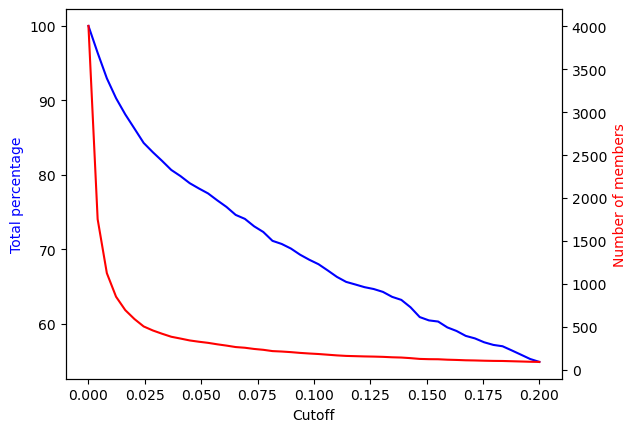

In [9]:
PDB_SS.plot_classes_vs_cutoff(.2, 50)

In [10]:
PDB_SS.tclass.sslist_from_classid('+RHHook')

In [14]:
# Remapping binary classes into six-space
# the tclass.binary_to_six_classes() function returns
# all possible combinations as a list of sextant-based
# strings. These variable names correspond to the names given by
# Hogg et al.

# most prevelent
LHSpiral_neg = PDB_SS.tclass.binary_to_six_class("00000")
RHSpiral_neg = PDB_SS.tclass.binary_to_six_class("02220")

LHSpiral_pminus = PDB_SS.tclass.binary_to_six_class("20000")
LHSpiral_plus = PDB_SS.tclass.binary_to_six_class("20002")

LHHook_neg = PDB_SS.tclass.binary_to_six_class("00020")
LHHook_pminus = PDB_SS.tclass.binary_to_six_class("20020")
LHHook_plus = PDB_SS.tclass.binary_to_six_class("20022")
LHHook_minus_plus = PDB_SS.tclass.binary_to_six_class("22000")

# Catalytic
RHHook_pminus = PDB_SS.tclass.binary_to_six_class("20220")

RHHook_minus = PDB_SS.tclass.binary_to_six_class("02200")

# Allosteric
RHStaple_neg = PDB_SS.tclass.binary_to_six_class("00200")

RHStaple_pminus = PDB_SS.tclass.binary_to_six_class("20200")
RHStaple_plus = PDB_SS.tclass.binary_to_six_class("20202")

LHStaple_neg = PDB_SS.tclass.binary_to_six_class("02020")
LHStaple_pminus = PDB_SS.tclass.binary_to_six_class("22020")
LHStaple_plus = PDB_SS.tclass.binary_to_six_class("22022")

RHSpiral_pminus = PDB_SS.tclass.binary_to_six_class("22220")
RHSpiral_plus = PDB_SS.tclass.binary_to_six_class("22222")



# Examining a Catalytic Disulfide Class
RHHook_pminus is considered to be 'catalytic', so we can
look more closely in six-space by examining the number of disulfides within
each of the possible six-space strings computed above:

For each six-class ID in the combo list, return the sslist represented by
that class and calculate the number of SS in it. 
Plot the results.

In [21]:
df = iconv -c -f utf-8 -t ascii//translit @proteusPy/Disulfide.py > cleaned.py
enumerate_sixclass_fromlist(PDB_SS, RHHook_pminus)

#df
y = plot_count_vs_class_df(df, 'RHH_pminus', theme='light')

In [ ]:
df2 = enumerate_sixclass_fromlist(RHStaple_neg)
plot_count_vs_class_df(df2, 'RHStaple_neg (Allosteric)', theme='light')

In [ ]:
df = enumerate_sixclass_fromlist(LHSpiral_neg)
plot_count_vs_class_df(df, title='LHSpiral_neg', theme='light')



In [ ]:
df4 = enumerate_sixclass_fromlist(RHSpiral_plus)
plot_count_vs_classid(df4, title='RHSpiral_plus', theme=THEME)

In [ ]:
from scipy.optimize import minimize
import numpy as np

def energy_function(x):
    chi1, chi2, chi3, chi4, chi5 = x
    energy = 2.0 * (np.cos(np.deg2rad(3.0 * chi1)) + np.cos(np.deg2rad(3.0 * chi5)))
    energy += np.cos(np.deg2rad(3.0 * chi2)) + np.cos(np.deg2rad(3.0 * chi4))
    energy += 3.5 * np.cos(np.deg2rad(2.0 * chi3)) + 0.6 * np.cos(np.deg2rad(3.0 * chi3)) + 10.1
    return energy

initial_guess = [-60.0, -60.0, 90.0, -60.0, -60.0] # initial guess for chi1, chi2, chi3, chi4, chi5
result = minimize(energy_function, initial_guess, method="Nelder-Mead")
minimum_energy = result.fun
inputs = result.x
inputs[0]


In [ ]:
best_ss = Disulfide('BestDisulfide')
best_ss.build_model(inputs[0], inputs[1], inputs[2], inputs[3], inputs[4])
best_ss.pprint()


In [ ]:
def download_and_save_binary(url, filename):
    import requests
    response = requests.get(url)
    content = response.content
    open(filename, "wb+").write(content)

# download_and_save_binary("https://github.com/suchanek/proteusPy/blob/0adcd3185604f87b5f366232473a961fb67e6ac9/proteusPy/data/PDB_SS_ALL_LOADER.pkl", "SS.pkl")